In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 17.1 MB 4.1 MB/s eta 0:00:01
  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
     |████████████████████████████████| 3.2 MB 86.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 60.9 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import*
import copy
import math
%matplotlib inline

In [5]:
# Load the dataset
x_train, y_train = load_data()

In [6]:
# View variables
# print x_train
print('Type of x_train:', type(x_train))
print('First five elements of x_train are:\n', x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [7]:
# print y_train
print('Type of y_train:', type(y_train))
print('First five elements of y_train are:\n', y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [8]:
# Check the dimensions of variables
print('The shape of x_train is:', x_train.shape)
print('The shape of y_train is:', y_train.shape)
print('Number of training example (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is: (97,)
Number of training example (m): 97


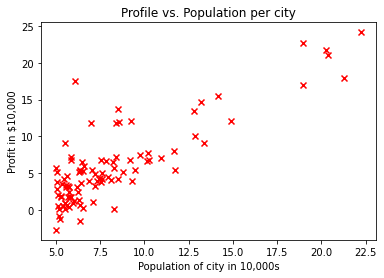

In [12]:
# Visualize the data
# Create a scatter plot of the data. To change the markers to red 'x'
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Profile vs. Population per city')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of city in 10,000s')
plt.show()

In [14]:
# Compute the cost function
def compute_cost(x, y, w, b):
    m = x.shape[0]

    total_cost = 0
    
    sum_of_cost = 0

    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost = (f_wb - y[i])**2
        sum_of_cost = sum_of_cost + cost
    
    total_cost = (1/(2*m))*sum_of_cost 

    return total_cost

In [15]:
# Compute the gradient
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_dw = 0

    sum_of_dj_dw = 0
    sum_of_dj_db = 0

    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        sum_of_dj_dw = sum_of_dj_dw + dj_dw_i
        sum_of_dj_db = sum_of_dj_db + dj_db_i

    dj_dw = sum_of_dj_dw/m
    dj_db = sum_of_dj_db/m

    return dj_dw, dj_db

In [17]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [18]:
# Learning parameters using batch gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in) # avoid modifying blobal w within function
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        # PRint cost every at intervals 10 times or as many iterations if < 10
        if i%math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f'Iteration {i:4}: Cost {float(J_history[-1]):8.2f}')
    
    return w, b, J_history, w_history

In [20]:
# Run the gradient descent algorithm above to learn the parameters for our dataset.
initial_w = 0
initial_b = 0

iterations = 1500
alpha = 0.01

w,b,_,_= gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print('w,b found by gradient descent:',w, b)

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [21]:
# Now calculate the predictions
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of city in 10,1000s')

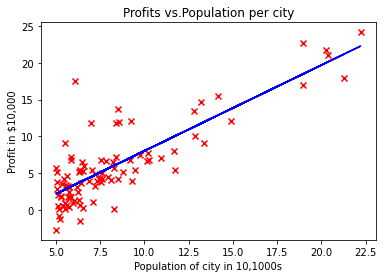

In [24]:
# Plot the predicted values to see the linear fit
plt.plot(x_train, predicted, c ='b')
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Profits vs.Population per city')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of city in 10,1000s')

In [27]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))
predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
